# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV61"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
299,DMAP_ERY5,61,0.555490,0.001138,0.008546
300,SVM Neutrophils,61,0.647067,0.000469,0.004059


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP050000, SRP056840, SRP062966, SRP050272, SRP055916, SRP057500, SRP018028, SRP042623, SRP041620, SRP058654, SRP049820, SRP055874, SRP043033, SRP033266, SRP034732, SRP056443, SRP056784, SRP055569, SRP055513, SRP029899, SRP046233, SRP005279, SRP029990, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (22 != 23)
  warnings.warn(


In [18]:
lv_data.shape

(1967, 53)

In [19]:
lv_data.head()

patient id sirs outcomes sirs vs sepsis disease status  \
project   run                                                                 
SRP050000 SRR1656463   001-0091          SIRS           SIRS            NaN   
          SRR1656464   001-0121          SIRS           SIRS            NaN   
          SRR1656462   001-0061          SIRS           SIRS            NaN   
          SRR1656465   001-0161          SIRS           SIRS            NaN   
          SRR1656467   002-0018          SIRS           SIRS            NaN   

                     tissue anti-ro  ism disease  \
project   run                                      
SRP050000 SRR1656463    NaN     NaN  NaN     NaN   
          SRR1656464    NaN     NaN  NaN     NaN   
          SRR1656462    NaN     NaN  NaN     NaN   
          SRR1656465    NaN     NaN  NaN     NaN   
          SRR1656467    NaN     NaN  NaN     NaN   

                     [PHENOPLIER] Unknown attribute cell type  ...  \
project   run                                                  ...   
SRP050000 SRR1656463                            NaN       NaN  ...   
          SRR1656464                            NaN       NaN  ...   
          SRR1656462                            NaN       NaN  ...   
          SRR1656465                            NaN       NaN  ...   
          SRR1656467                            NaN       NaN  ...   

                     cytogenetics mutation resonse to decitabine  \
project   run                                                      
SRP050000 SRR1656463          NaN      NaN                   NaN   
          SRR1656464          NaN      NaN                   NaN   
          SRR1656462          NaN      NaN                   NaN   
          SRR1656465          NaN      NaN                   NaN   
          SRR1656467          NaN      NaN                   NaN   

                     response to decitabine  \
project   run                                 
SRP050000 SRR1656463                    NaN   
          SRR1656464                    NaN   
          SRR1656462                    NaN   
          SRR1656465                    NaN   
          SRR1656467                    NaN   

                     type of chronic myelomonocytic leukemia all lineage  \
project   run                                                              
SRP050000 SRR1656463                                     NaN         NaN   
          SRR1656464                                     NaN         NaN   
          SRR1656462                                     NaN         NaN   
          SRR1656465                                     NaN         NaN   
          SRR1656467                                     NaN         NaN   

                     bcp all subtype cytogenetic background  \
project   run                                                 
SRP050000 SRR1656463             NaN                    NaN   
          SRR1656464             NaN                    NaN   
          SRR1656462             NaN                    NaN   
          SRR1656465             NaN                    NaN   
          SRR1656467             NaN                    NaN   

                     pre- or post-challenge      LV61  
project   run                                          
SRP050000 SRR1656463                    NaN  0.509483  
          SRR1656464                    NaN  0.257530  
          SRR1656462                    NaN  0.103008  
          SRR1656465                    NaN  0.225307  
          SRR1656467                    NaN  0.655891  

[5 rows x 53 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

sirs vs sepsis                    0.071076
sirs outcomes                     0.069451
patient id                        0.060707
[PHENOPLIER] Unknown attribute    0.022339
anti-ro                           0.017791
ism                               0.017791
disease status                    0.017791
tissue                            0.011613
disease                           0.010306
treatment                         0.009521
time point                        0.009521
subject                           0.009521
treatment status                  0.008275
disease/health status             0.008275
disease state                     0.007564
diagnosis                         0.007270
resonse to decitabine             0.005700
age                               0.005232
gender                            0.005165
mutation                          0.005161
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

tissue       0.011613
cell type    0.001545
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "tissue",
        "cell type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

tissue cell type      LV61
project   run                                        
SRP050000 SRR1656474          NaN       NaN  1.470130
SRP056840 SRR1951662          NaN       NaN  1.398085
SRP050000 SRR1656475          NaN       NaN  1.327727
SRP056840 SRR1951747          NaN       NaN  1.255634
          SRR1951708          NaN       NaN  0.929331
          SRR1951669          NaN       NaN  0.885691
SRP050000 SRR1656578          NaN       NaN  0.873676
          SRR1656571          NaN       NaN  0.835015
SRP056840 SRR1951727          NaN       NaN  0.824854
SRP050000 SRR1656586          NaN       NaN  0.822057
SRP062966 SRR2443148  whole blood       NaN  0.816850
SRP050000 SRR1656473          NaN       NaN  0.793207
          SRR1656495          NaN       NaN  0.780212
SRP056840 SRR1951686          NaN       NaN  0.771227
          SRR1951715          NaN       NaN  0.753267
SRP050000 SRR1656583          NaN       NaN  0.747866
SRP056840 SRR1951721          NaN       NaN  0.746937
SRP050000 SRR1656545          NaN       NaN  0.746806
SRP056840 SRR1951746          NaN       NaN  0.722370
          SRR1951706          NaN       NaN  0.715867
SRP050000 SRR1656497          NaN       NaN  0.714913
          SRR1656524          NaN       NaN  0.702978
SRP056840 SRR1951734          NaN       NaN  0.688113
          SRR1951748          NaN       NaN  0.672089
          SRR1951665          NaN       NaN  0.661612

In [25]:
# what is there in these projects?
lv_data.loc[["SRP056840"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

patient id                  sirs outcomes      LV61
project   run                                                           
SRP056840 SRR1951662   002-0179    Acute Kidney Injury stage 0  1.398085
          SRR1951747   002-0174                   Hemodialysis  1.255634
          SRR1951708   002-0310    Acute Kidney Injury stage 1  0.929331
          SRR1951669   002-0274    Acute Kidney Injury stage 0  0.885691
          SRR1951727   002-0006  Acute Kidney Injury stage 2/3  0.824854
          SRR1951686   002-0018    Acute Kidney Injury stage 1  0.771227
          SRR1951715   002-0011  Acute Kidney Injury stage 2/3  0.753267
          SRR1951721   002-0022  Acute Kidney Injury stage 2/3  0.746937
          SRR1951746   002-0059                   Hemodialysis  0.722370
          SRR1951706   001-0194    Acute Kidney Injury stage 1  0.715867

In [26]:
SELECTED_ATTRIBUTE = "tissue"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["cell type"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

tissue      LV61
project   run                                  
SRP050000 SRR1656474  NOT CATEGORIZED  1.470130
SRP056840 SRR1951662  NOT CATEGORIZED  1.398085
SRP050000 SRR1656475  NOT CATEGORIZED  1.327727
SRP056840 SRR1951747  NOT CATEGORIZED  1.255634
          SRR1951708  NOT CATEGORIZED  0.929331
          SRR1951669  NOT CATEGORIZED  0.885691
SRP050000 SRR1656578  NOT CATEGORIZED  0.873676
          SRR1656571  NOT CATEGORIZED  0.835015
SRP056840 SRR1951727  NOT CATEGORIZED  0.824854
SRP050000 SRR1656586  NOT CATEGORIZED  0.822057
SRP062966 SRR2443148      whole blood  0.816850
SRP050000 SRR1656473  NOT CATEGORIZED  0.793207
          SRR1656495  NOT CATEGORIZED  0.780212
SRP056840 SRR1951686  NOT CATEGORIZED  0.771227
          SRR1951715  NOT CATEGORIZED  0.753267
SRP050000 SRR1656583  NOT CATEGORIZED  0.747866
SRP056840 SRR1951721  NOT CATEGORIZED  0.746937
SRP050000 SRR1656545  NOT CATEGORIZED  0.746806
SRP056840 SRR1951746  NOT CATEGORIZED  0.722370
          SRR1951706  NOT CATEGORIZED  0.715867

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            "peripheral blood": "Peripheral blood",
            "peripheral whole blood": "Peripheral blood",
            "": "",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP050000"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Whole blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'sirs vs sepsis']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
_srp_code = "SRP056840"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Whole blood (Sepsis)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [38]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [39]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [43]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [44]:
len(attr_order)

15

In [45]:
attr_order[:5]

['Whole blood (SIRS)',
 'Whole blood (Sepsis)',
 'Whole blood',
 'NOT CATEGORIZED',
 'bone marrow']

## Plot

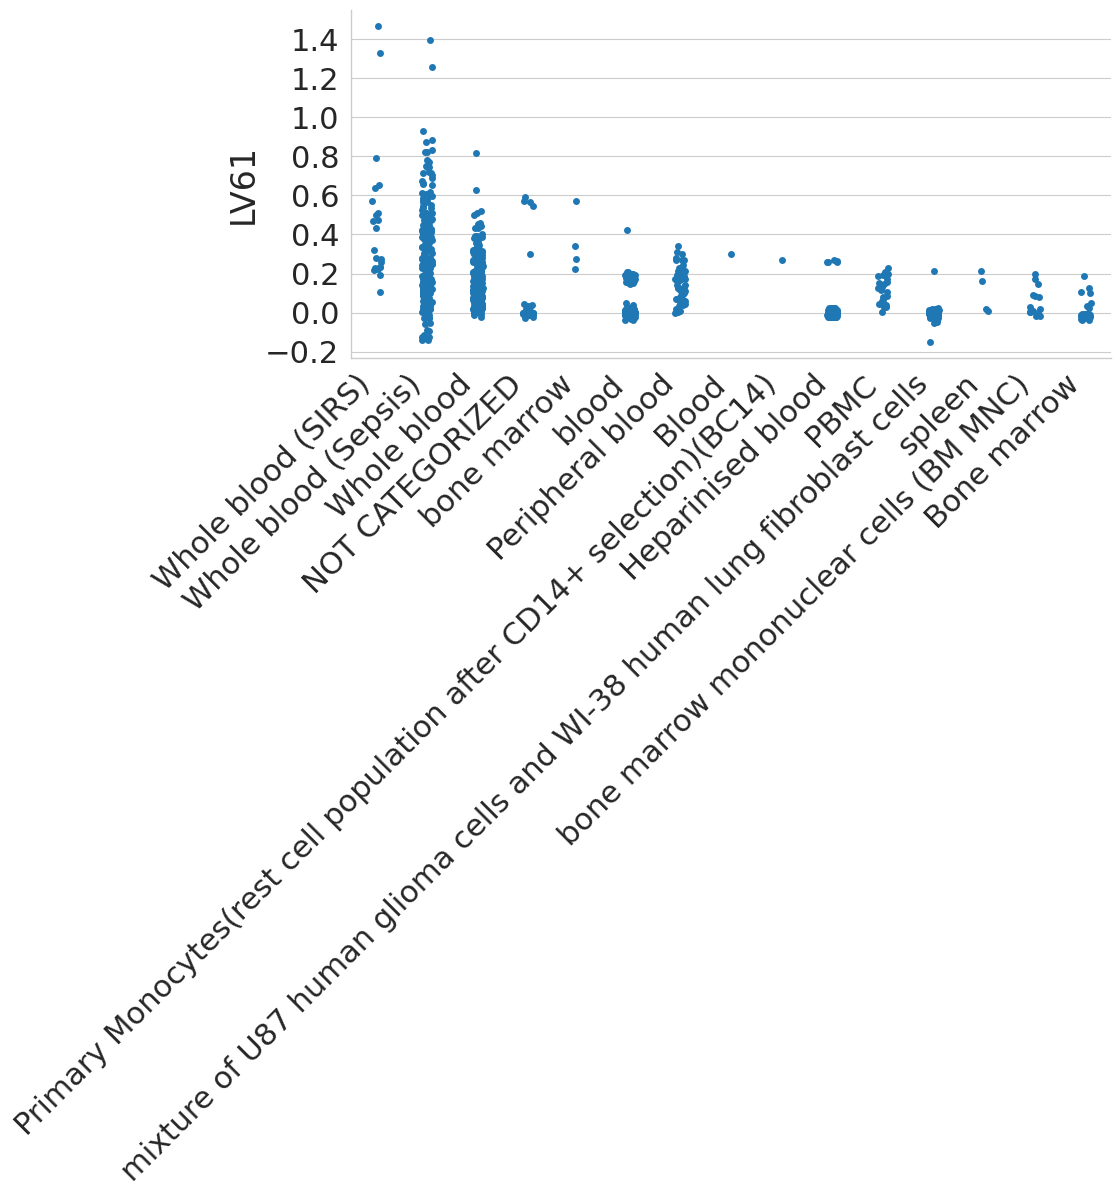

In [46]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [140]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [158]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("peripheral blo")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

tissue      LV61
project   run                                   
SRP042623 SRR1313299  peripheral blood  0.340844
          SRR1313301  peripheral blood  0.310751
          SRR1313296  peripheral blood  0.246118
          SRR1313302  peripheral blood  0.214239
          SRR1313303  peripheral blood  0.189493
          SRR1313290  peripheral blood  0.188060
          SRR1313291  peripheral blood  0.187775
          SRR1313300  peripheral blood  0.185993
          SRR1313292  peripheral blood  0.184537
          SRR1313293  peripheral blood  0.174943
          SRR1313288  peripheral blood  0.171078
          SRR1313297  peripheral blood  0.169878
          SRR1313298  peripheral blood  0.167020
          SRR1313289  peripheral blood  0.142412
          SRR1313295  peripheral blood  0.125512
          SRR1313294  peripheral blood  0.083334

In [107]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP062966"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

disease status       tissue  \
project   run                                                           
SRP062966 SRR2443148  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443225  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443253                             healthy  whole blood   
          SRR2443147  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443165  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443159  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443244  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443219  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443180  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443178  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443194  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443179  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443182  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443250                             healthy  whole blood   
          SRR2443152  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443202  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443181  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443160  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443254                             healthy  whole blood   
          SRR2443220  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443198  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443223  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443191  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443242  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443249                             healthy  whole blood   
          SRR2443257                             healthy  whole blood   
          SRR2443172  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443241  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443201  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443205  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443262                             healthy  whole blood   
          SRR2443162  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443215  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443161  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443150  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443212  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443192  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443197  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443256                             healthy  whole blood   
          SRR2443199  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443209  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443218  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443176  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443239  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443222  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443157  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443261                             healthy  whole blood   
          SRR2443221  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443211  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443151  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443196  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443217  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443185  systemic lupus erythematosus (SLE)  whole blood   
          SRR2443200  syste

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )